In [2]:
import xarray as xr
path = '../JUL2020.aijWISO_20th_E2.1.ERA5_ANL.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset> Size: 29MB
Dimensions:                             (lon: 144, lat: 90, shnhgm: 3)
Coordinates:
  * lon                                 (lon) float32 576B -178.8 ... 178.8
  * lat                                 (lat) float32 360B -90.0 -87.0 ... 90.0
Dimensions without coordinates: shnhgm
Data variables: (12/1121)
    axyp                                (lat, lon) float32 52kB ...
    ocnfr                               (lat, lon) float32 52kB ...
    ocnfr_hemis                         (shnhgm) float32 12B ...
    landfr                              (lat, lon) float32 52kB ...
    landfr_hemis                        (shnhgm) float32 12B ...
    oicefr                              (lat, lon) float32 52kB ...
    ...                                  ...
    L-O_TI                              (lat, lon) float32 52kB ...
    L-O_TI_hemis                        (shnhgm) float32 12B ...
    Tatm                                (lat, lon) float32 52kB ...
    Tatm_hemis                          (shnhgm) float32 12B ...
    TMINC                               (lat, lon) float32 52kB ...
    TMINC_hemis                         (shnhgm) float32 12B ...
Attributes:
    xlabel:   WISO_20th_ERA5_ANL (prescribed ocean atmospheric tracer model w...
    fromto:   From:  2020  JUL  1,  Hr  0      To:  2020  AUG  1, Hr  0  Mode...

# Cartopy

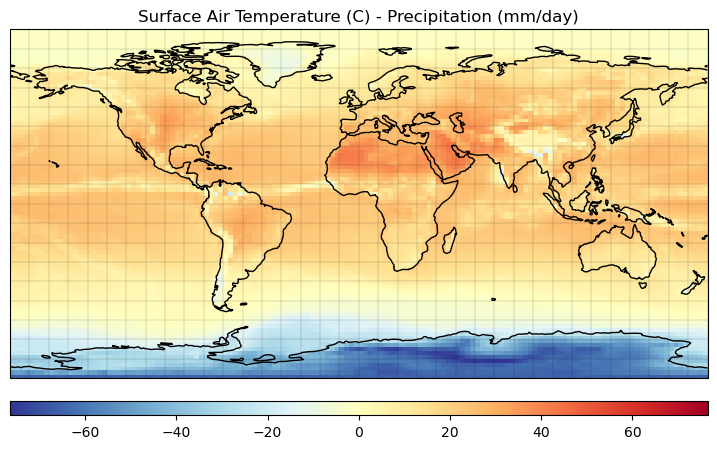

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature
import matplotlib.ticker as mticker

# setting up the initial "canvas" we'll put the figure on
fig = plt.figure(figsize=(9,6)) # figsize specifies shape of figure
# what type of globe projection we want and where we want it centered:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0)) 

# configure gridlines across the map
gl = ax.gridlines(linewidth=0.1, color='black')
# Set the interval for longitude and latitude gridlines
gl.xlocator = mticker.FixedLocator(range(-180, 181, 10))  # Longitude every 10 degrees
gl.ylocator = mticker.FixedLocator(range(-90, 91, 10))    # Latitude every 10 degrees

ax.coastlines() # coastlines

# put our actual data on the plot:
cbar_kwargs = {'orientation':'horizontal', 'pad':0.05, 'aspect':50} # visual options for colorbar
# plotting the data on the graph (ax), with RdYlBu_r color scale and colorbar options
cf = (ds['tsurf']-ds['prec']).plot(ax=ax, cmap='RdYlBu_r', cbar_kwargs=cbar_kwargs)

plt.title('Surface Air Temperature (C) - Precipitation (mm/day)') # title
plt.savefig('plot.png') # if you want to save to image on disk
fig # display figure

# XArray

https://docs.xarray.dev/en/stable/examples/area_weighted_temperature.html

In [5]:
hemi = ds.sel(lat=slice(0, 90)) # filter the data to get just the northern hemisphere
prec_weighted = hemi['prec'].weighted(hemi['axyp']) # weight the precipitation variable by the axyp variable
mean_prec_weighted = prec_weighted.mean() # calculate the mean
mean_prec_weighted # display result

<xarray.DataArray 'prec' ()> Size: 4B
np.float32(3.414454)